In [16]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

In [17]:
df = pd.read_csv("/Users/Alex/Downloads/Pre-procesado.csv")

In [18]:
# Entrene la división de prueba para evitar el sobreajuste
X_train = df.drop(labels=['Label'], axis=1)
y_train = df['Label']

In [19]:
X_train.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,85.123,5.111,45.454,139.856,-999.000,-999.000,-999.000,1.288,6.593,212.788,...,-2.521,327.124,1,145.787,-0.903,0.656,-999.000,-999.00,-999.000,145.787
1,70.751,16.532,47.178,107.916,4.446,442.881,-4.514,1.221,49.749,209.956,...,-1.118,326.261,3,58.119,-2.876,2.317,39.964,1.57,1.271,137.049
2,-999.000,79.211,77.286,0.998,-999.000,-999.000,-999.000,1.879,0.998,92.329,...,0.655,102.229,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
3,74.959,58.796,58.484,24.962,-999.000,-999.000,-999.000,2.628,24.962,57.390,...,1.663,84.495,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,-999.000,82.701,109.640,2.044,-999.000,-999.000,-999.000,2.674,2.044,62.347,...,0.508,110.727,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [20]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.16129507, 0.1049026 , 0.09070563, 0.03722264, 0.04300058,
       0.04158299, 0.04038338, 0.01744108, 0.01426114, 0.04442075,
       0.04223728, 0.04899779, 0.03056997, 0.06652921, 0.00899477,
       0.00325464, 0.01621025, 0.0151056 , 0.00705433, 0.03198036,
       0.00290951, 0.03635253, 0.02348054, 0.0350357 , 0.03237701,
       0.01958494, 0.02299668, 0.02968285, 0.02436111, 0.03335854])

In [21]:
l = []
for feature in zip(mutual_info,X_train.columns):
    l.append(feature)
l.sort(reverse=True)
l

[(0.1612950729910767, 'DER_mass_MMC'),
 (0.1049026032315179, 'DER_mass_transverse_met_lep'),
 (0.0907056317981847, 'DER_mass_vis'),
 (0.0665292138856961, 'PRI_tau_pt'),
 (0.04899779064506293, 'DER_met_phi_centrality'),
 (0.04442075372861232, 'DER_sum_pt'),
 (0.04300058103033555, 'DER_deltaeta_jet_jet'),
 (0.04223727585299919, 'DER_pt_ratio_lep_tau'),
 (0.04158299228153295, 'DER_mass_jet_jet'),
 (0.04038337877364673, 'DER_prodeta_jet_jet'),
 (0.03722263648326751, 'DER_pt_h'),
 (0.0363525344411757, 'PRI_met_sumet'),
 (0.03503570484639651, 'PRI_jet_leading_pt'),
 (0.03335853801744837, 'PRI_jet_all_pt'),
 (0.0323770082648045, 'PRI_jet_leading_eta'),
 (0.031980360839904076, 'PRI_met'),
 (0.030569966303922724, 'DER_lep_eta_centrality'),
 (0.029682852111172053, 'PRI_jet_subleading_eta'),
 (0.024361107146485317, 'PRI_jet_subleading_phi'),
 (0.023480540672943695, 'PRI_jet_num'),
 (0.022996677933349696, 'PRI_jet_subleading_pt'),
 (0.019584936715475454, 'PRI_jet_leading_phi'),
 (0.017441077875918

In [22]:
l_i = []
l_v = []
for importance in range(len(l)):
    for var in range(len(l[importance])):
        if(var == 0):
            l_i.append(l[importance][var])
        else:
            l_v.append(l[importance][var])

In [23]:
import matplotlib.pyplot as plt
import numpy as np
y = np.array(l_i[0:10])
x = np.array(l_v[0:10])

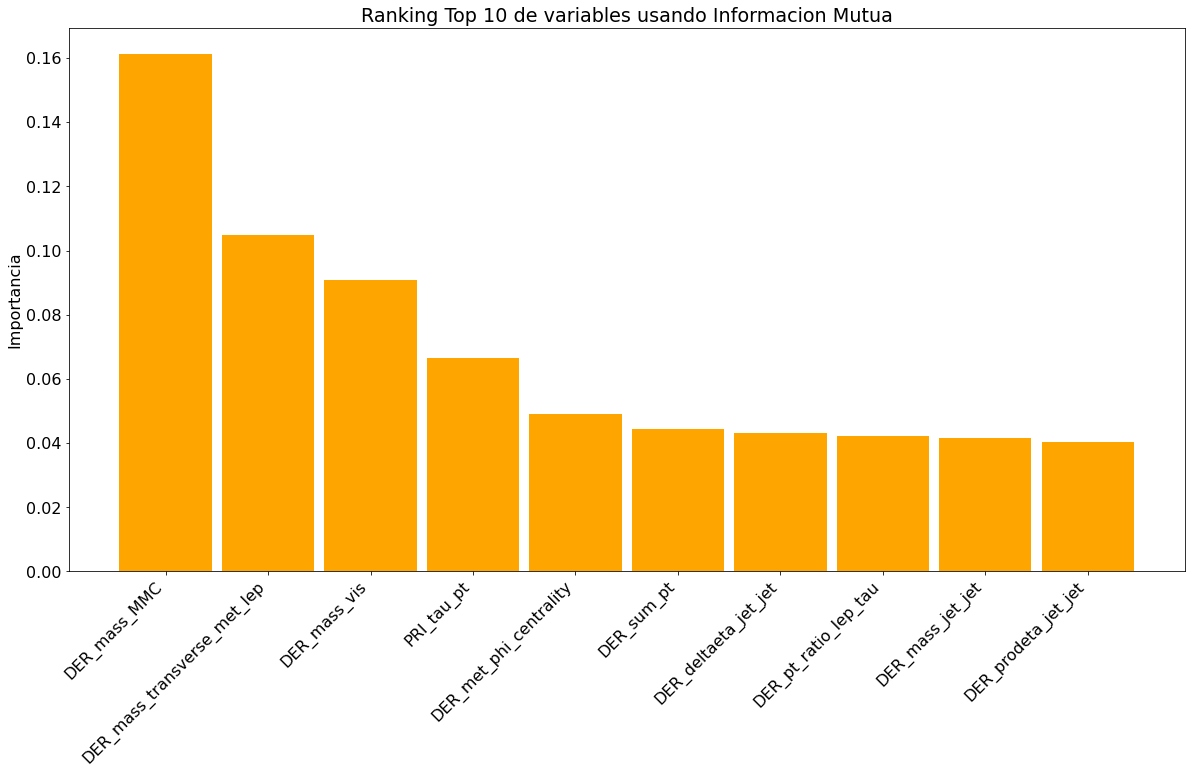

In [24]:
import matplotlib
font = {'size'   : 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize = (20, 10))


# creating the bar plot
plt.ylabel("Importancia")
plt.bar(x, y, color ='orange',
        width = 0.9)
plt.xticks(rotation=45, ha='right')
plt.title("Ranking Top 10 de variables usando Informacion Mutua")
plt.show()